#  Get the Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
path = r''
def load_diamonds_data(diamonds_path=path):
    csv_path = os.path.join(diamonds_path, "diamonds.csv")
    return pd.read_csv(csv_path)


diamonds = load_diamonds_data()

#  Discover and visualize the data

## A- Data discovery

In [ ]:
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
diamonds.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## B- Data visualization

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'carat'}>,
        <AxesSubplot:title={'center':'depth'}>],
       [<AxesSubplot:title={'center':'table'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'x'}>],
       [<AxesSubplot:title={'center':'y'}>,
        <AxesSubplot:title={'center':'z'}>, <AxesSubplot:>]], dtype=object)

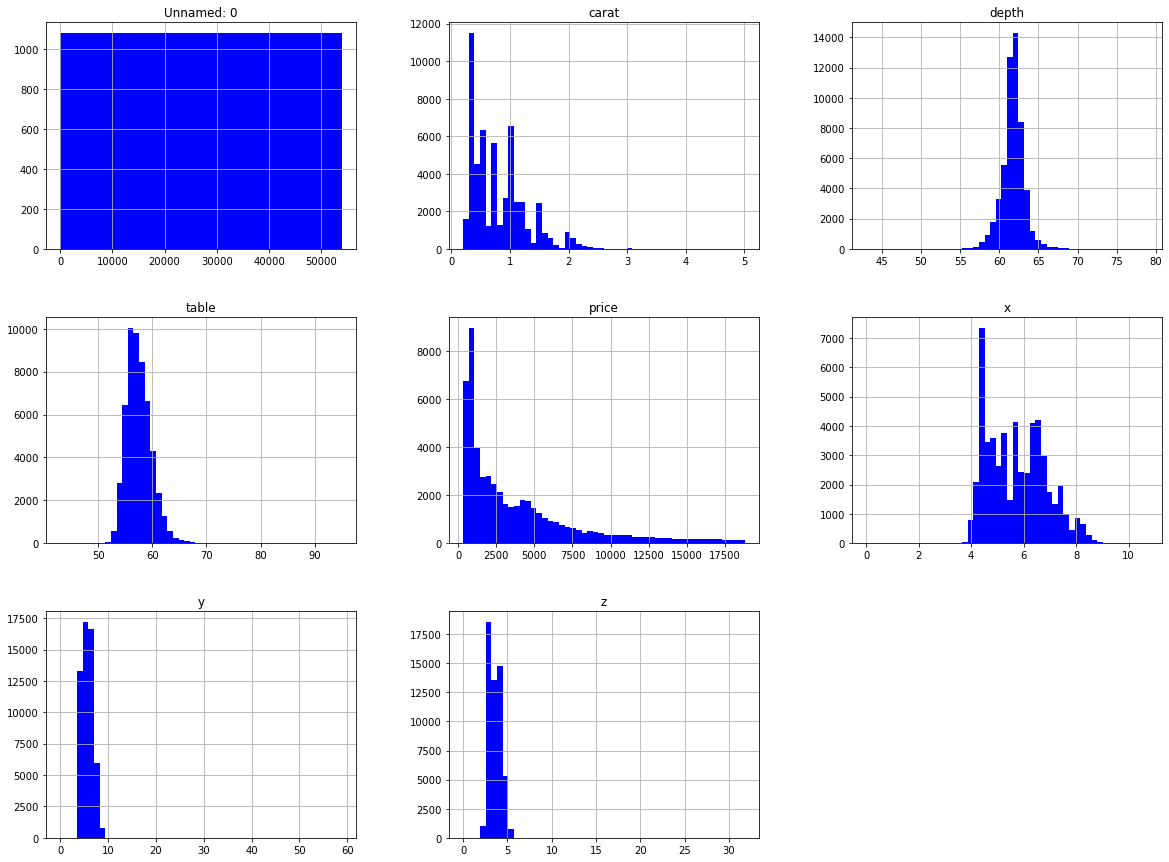

In [ ]:
diamonds.hist(bins=50, figsize=(20,15),color='b')

Text(0.5, 1.0, 'Correlation between numerical attributes')

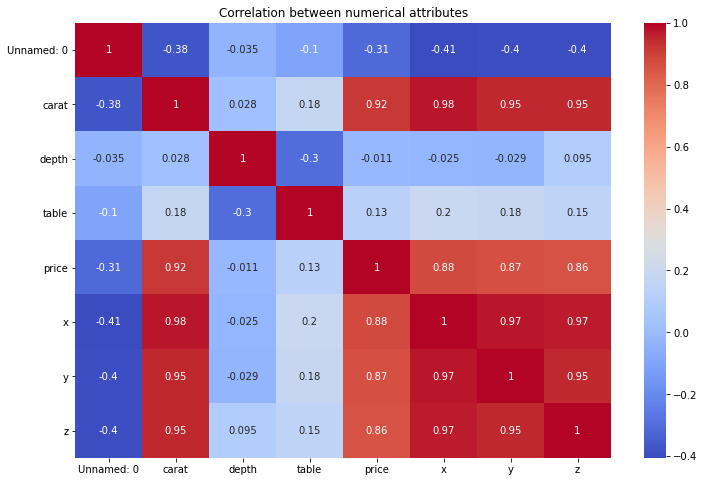

In [ ]:
plt.figure(figsize = (12,8))
sns.heatmap(diamonds.corr(),annot=True,cmap='coolwarm')
plt.title("Correlation between numerical attributes")

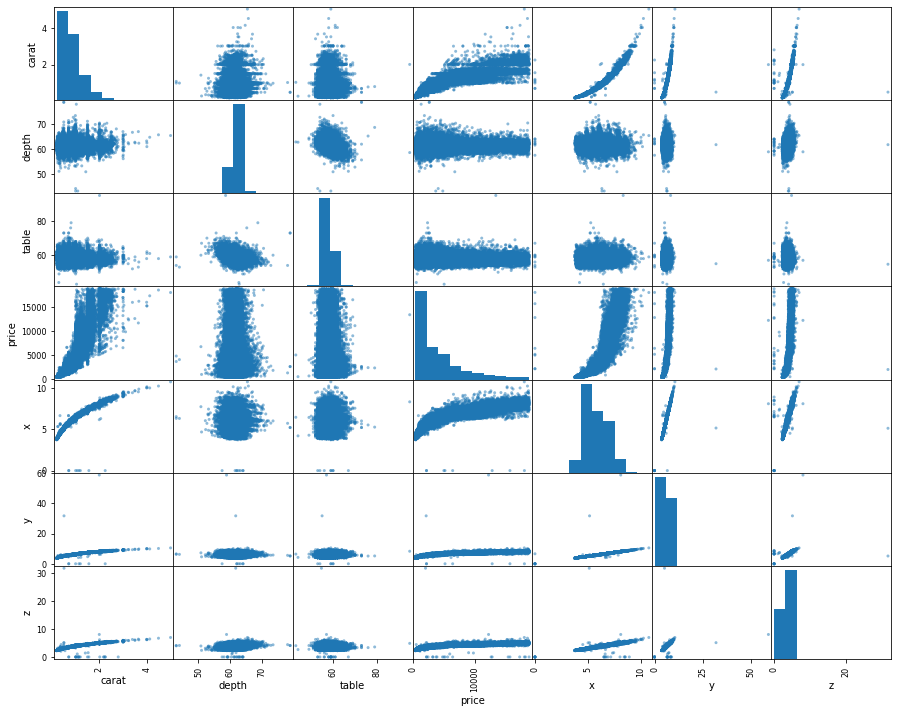

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["carat", "depth", "table","price","x","y","z"]
scatter_matrix(diamonds[attributes], figsize=(15, 12))
plt.show()

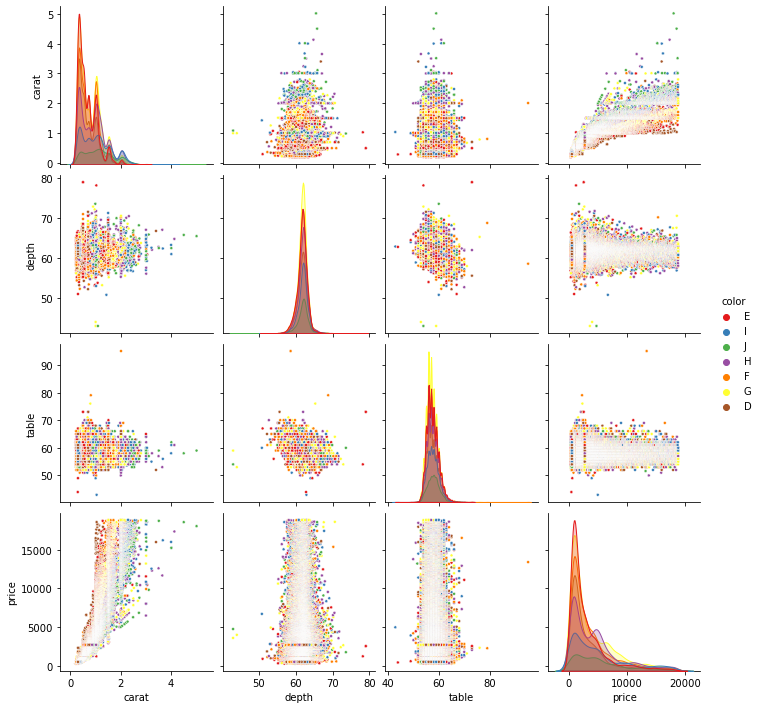

In [ ]:
attributes=['carat','depth','table','price','color']
sns.pairplot(diamonds[attributes], hue='color',markers='.',palette='Set1')
plt.show()

<AxesSubplot:xlabel='count', ylabel='color'>

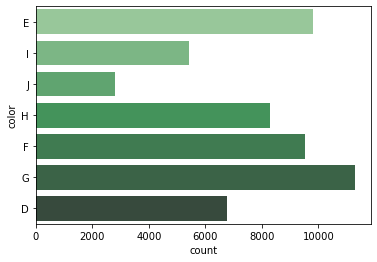

In [ ]:
sns.countplot(y='color', data=diamonds, palette="Greens_d")

<AxesSubplot:xlabel='count', ylabel='clarity'>

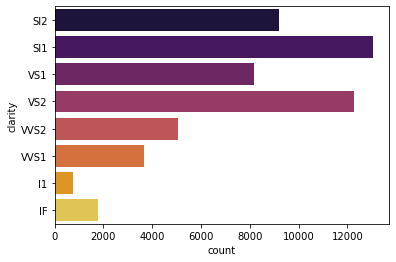

In [ ]:
sns.countplot(y='clarity', data=diamonds, palette="inferno")

<AxesSubplot:xlabel='count', ylabel='cut'>

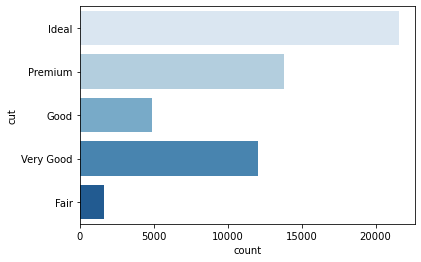

In [ ]:
sns.countplot(y='cut', data=diamonds, palette="Blues")

<AxesSubplot:xlabel='price', ylabel='color'>

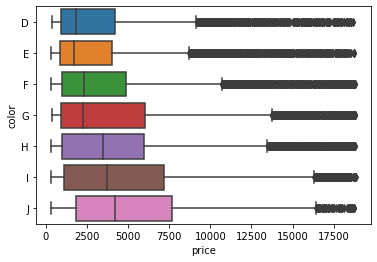

In [ ]:
order=['D','E','F','G','H','I','J'] # D being the best and J the worst
sns.boxplot(x='price',y='color',data=diamonds,order=order)

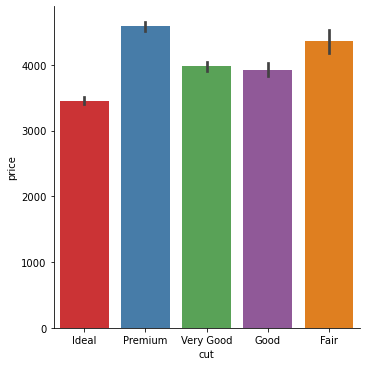

In [ ]:
order=['Ideal','Premium','Very Good','Good','Fair'] #Quality in increasing order Fair, Good, Very Good, Premium, Ideal
sns.catplot(data= diamonds, x='cut',y='price',kind='bar',order=order,palette='Set1')

# Prepare the data

In [ ]:
print(diamonds[diamonds.isnull()].count())  # check for null values

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64


In [ ]:
print(diamonds[(diamonds['x'] == 0) | (diamonds['y'] == 0) | (
        diamonds['z'] == 0)])   #search on a df where z or y or x equals zero

       Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
2207         2208   1.00    Premium     G     SI2   59.1   59.0   3142  6.55   
2314         2315   1.01    Premium     H      I1   58.1   59.0   3167  6.66   
4791         4792   1.10    Premium     G     SI2   63.0   59.0   3696  6.50   
5471         5472   1.01    Premium     F     SI2   59.2   58.0   3837  6.50   
10167       10168   1.50       Good     G      I1   64.0   61.0   4731  7.15   
11182       11183   1.07      Ideal     F     SI2   61.6   56.0   4954  0.00   
11963       11964   1.00  Very Good     H     VS2   63.3   53.0   5139  0.00   
13601       13602   1.15      Ideal     G     VS2   59.2   56.0   5564  6.88   
15951       15952   1.14       Fair     G     VS1   57.5   67.0   6381  0.00   
24394       24395   2.18    Premium     H     SI2   59.4   61.0  12631  8.49   
24520       24521   1.56      Ideal     G     VS2   62.2   54.0  12800  0.00   
26123       26124   2.25    Premium     

In [ ]:
print((diamonds[(diamonds['x'] == 0) | (diamonds['y'] == 0) | (
        diamonds['z'] == 0)]).count())  # numof entries where z or y or x equals to zero

Unnamed: 0    20
carat         20
cut           20
color         20
clarity       20
depth         20
table         20
price         20
x             20
y             20
z             20
dtype: int64


In [ ]:
diamonds.drop(diamonds[(diamonds['x'] == 0) | (diamonds['y'] == 0) | (diamonds['z'] == 0)].index, inplace = True)
diamonds = diamonds.drop('Unnamed: 0', 1)

In [ ]:
diamonds['xyz'] = diamonds['x'] * diamonds['y'] * diamonds['z']
diamonds = diamonds.drop(['x', 'y', 'z'], 1)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,xyz
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250


In [ ]:
diamonds[diamonds['xyz'] == 0].count()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
xyz        0
dtype: int64

In [ ]:
diamonds.describe()
corr_matrix = diamonds.corr()
print(corr_matrix["price"].sort_values(ascending = False))

price    1.000000
carat    0.921592
xyz      0.904255
table    0.127245
depth   -0.010729
Name: price, dtype: float64


In [ ]:
#to drop extreme value in dataframe
max_threshold = diamonds['xyz'].quantile(0.99999)
diamonds.drop(index=(diamonds[diamonds['xyz']>max_threshold].index),inplace=True)

Text(0.5, 1.0, 'Correlation between numerical attributes')

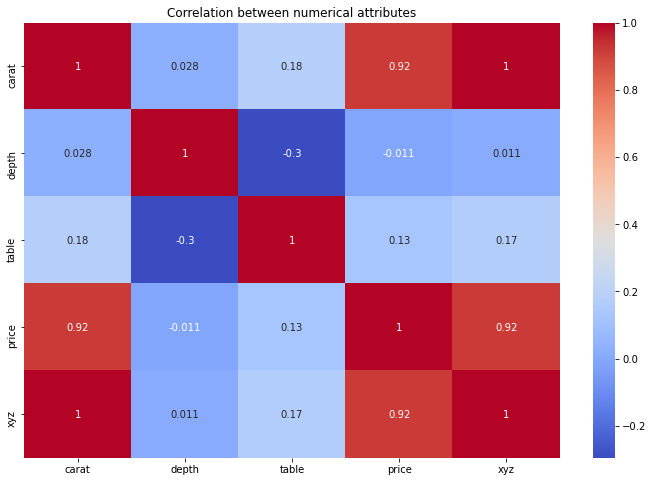

In [ ]:
plt.figure(figsize = (12,8))
sns.heatmap(diamonds.corr(),annot=True,cmap='coolwarm')
plt.title("Correlation between numerical attributes")

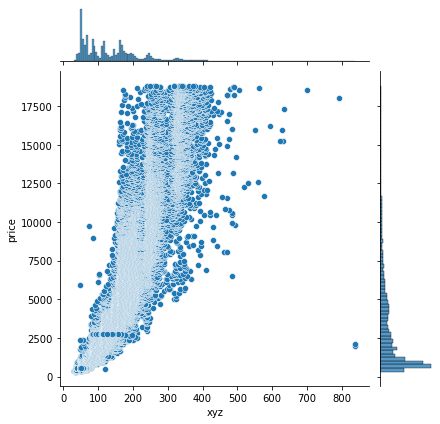

In [ ]:
sns.jointplot(x='xyz',y='price',data=diamonds,kind='scatter')

In [ ]:
# transform categorical values into numerical

from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
diamonds_cat_encoded = ordinal_encoder.fit_transform(diamonds)

diamonds['cut'] = ordinal_encoder.fit_transform(diamonds[['cut']])
diamonds['color'] = ordinal_encoder.fit_transform(diamonds[['color']])
diamonds['clarity'] = ordinal_encoder.fit_transform(diamonds[['clarity']])

# Create a Test Set and Train Set

In [ ]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

#split test train dataframe
X = diamonds[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'xyz']]
y = diamonds['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)


# Select and Train a Model

#    - Linear Regression model

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error
diamonds_predictions = lin_reg.predict(X_test)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Mean:\t\t\t", scores.mean())
    print("Standard deviation:     ", scores.std())
    print('Mean absolute error:    ', metrics.mean_absolute_error(y_test, diamonds_predictions))
    print('Root-mean-square error :', np.sqrt(metrics.mean_squared_error(y_test, diamonds_predictions)))
    print('Coefficient of determination: %.2f'% r2_score(y_test, diamonds_predictions))

display_scores(lin_rmse_scores)

Mean:			 1397.3617006999473
Standard deviation:      54.1704706697884
Mean absolute error:     927.2166904421855
Root-mean-square error : 1366.3919516817239
Coefficient of determination: 0.88


# - Decision Tree Regressor model


In [ ]:
#desision tree
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)


from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_model, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Mean:\t\t\t", scores.mean())
    print("Standard deviation:     ", scores.std())
    print('Mean absolute error:    ', metrics.mean_absolute_error(y_test, y_pred_tree))
    print('Root-mean-square error :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_tree)))
    print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred_tree))

display_scores(tree_rmse_scores)

Mean:			 752.7475212923046
Standard deviation:      24.97321364505523
Mean absolute error:     372.1304247032641
Root-mean-square error : 752.9595099868441
Coefficient of determination: 0.96


In [ ]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators=10, warm_start=False, min_samples_leaf=2, min_samples_split=4)
regr.fit(X_train, y_train)

y_pred_regr = regr.predict(X_test)


from sklearn.model_selection import cross_val_score
scores = cross_val_score(regr, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
regr_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Mean:\t\t\t", scores.mean())
    print("Standard deviation:     ", scores.std())
    print('Mean absolute error:    ', metrics.mean_absolute_error(y_test, y_pred_regr))
    print('Root-mean-square error :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_regr)))
    print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred_regr))

display_scores(regr_rmse_scores)

Mean:			 587.1061957983641
Standard deviation:      18.055739722124862
Mean absolute error:     294.07099009223396
Root-mean-square error : 573.9672681953483
Coefficient of determination: 0.98


# Fine-Tune Your Model



# - Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6]},
            {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}]
grid_search = GridSearchCV(regr, param_grid=parameters, cv=5,scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit( X_train, y_train)
grid_search.best_params_
grid_search.best_estimator_

RandomForestRegressor(max_features=6, min_samples_leaf=2, min_samples_split=4,
                      n_estimators=30)

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

806.9968943109101 {'max_features': 2, 'n_estimators': 3}
691.397088249038 {'max_features': 2, 'n_estimators': 10}
658.548477787263 {'max_features': 2, 'n_estimators': 30}
665.2592657518177 {'max_features': 4, 'n_estimators': 3}
595.5842954410363 {'max_features': 4, 'n_estimators': 10}
580.7509469191742 {'max_features': 4, 'n_estimators': 30}
637.3130551294041 {'max_features': 6, 'n_estimators': 3}
584.4757297688485 {'max_features': 6, 'n_estimators': 10}
571.556510728177 {'max_features': 6, 'n_estimators': 30}
739.1699647192604 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
642.6787931825927 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
666.2880295011521 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
610.3682624674622 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
651.6073944006097 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
588.6462206165918 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
parameters=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6]},
            {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}]
random_search = RandomizedSearchCV(regr, param_distributions=parameters, cv=5,scoring='neg_mean_squared_error',return_train_score=True)
random_search.fit( X_train, y_train)
random_search.best_params_
random_search.best_estimator_

RandomForestRegressor(max_features=6, min_samples_leaf=2, min_samples_split=4,
                      n_estimators=30)

# - Analyze the Best Models and Their Errors

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.13663893, 0.00167582, 0.03136613, 0.06400045, 0.00482703,
       0.00257388, 0.75891775])

# Evaluate Your System on the Test Set

In [ ]:
final_model = random_search.best_estimator_

final_predictions = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)


def display_scores(scores):
    print("final_predictions: ",      final_predictions)
    print('Mean absolute error:    ', final_mse)
    print('Root-mean-square error :', final_rmse)
    print('Coefficient of determination: %.2f'% r2_score(y_test, final_predictions))

display_scores(final_rmse)

final_predictions:  [2798.77253968 4400.88674603  675.83380952 ... 2951.40214286 2288.86095238
 2256.91111111]
Mean absolute error:     314337.42527867964
Root-mean-square error : 560.65802881853
Coefficient of determination: 0.98
